In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from google.colab import files
files.upload()

Saving AirPassengers.csv to AirPassengers.csv


{'AirPassengers.csv': b'Month,#Passengers\n1949-01,112\n1949-02,118\n1949-03,132\n1949-04,129\n1949-05,121\n1949-06,135\n1949-07,148\n1949-08,148\n1949-09,136\n1949-10,119\n1949-11,104\n1949-12,118\n1950-01,115\n1950-02,126\n1950-03,141\n1950-04,135\n1950-05,125\n1950-06,149\n1950-07,170\n1950-08,170\n1950-09,158\n1950-10,133\n1950-11,114\n1950-12,140\n1951-01,145\n1951-02,150\n1951-03,178\n1951-04,163\n1951-05,172\n1951-06,178\n1951-07,199\n1951-08,199\n1951-09,184\n1951-10,162\n1951-11,146\n1951-12,166\n1952-01,171\n1952-02,180\n1952-03,193\n1952-04,181\n1952-05,183\n1952-06,218\n1952-07,230\n1952-08,242\n1952-09,209\n1952-10,191\n1952-11,172\n1952-12,194\n1953-01,196\n1953-02,196\n1953-03,236\n1953-04,235\n1953-05,229\n1953-06,243\n1953-07,264\n1953-08,272\n1953-09,237\n1953-10,211\n1953-11,180\n1953-12,201\n1954-01,204\n1954-02,188\n1954-03,235\n1954-04,227\n1954-05,234\n1954-06,264\n1954-07,302\n1954-08,293\n1954-09,259\n1954-10,229\n1954-11,203\n1954-12,229\n1955-01,242\n1955-02,

In [9]:
#Leitura dos dados
#Importante criar métodos de indexação por datas
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month')

In [3]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
data.dtypes

#Passengers    int64
dtype: object

Text(0.5, 0, 'Data - mensal')

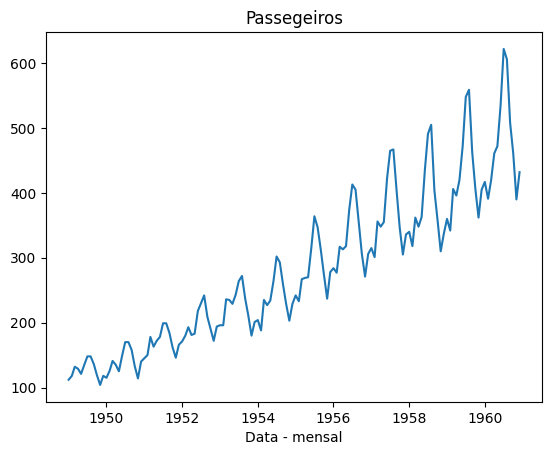

In [5]:
plt.plot(data)
plt.title('Passegeiros')
plt.xlabel('Data - mensal')

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

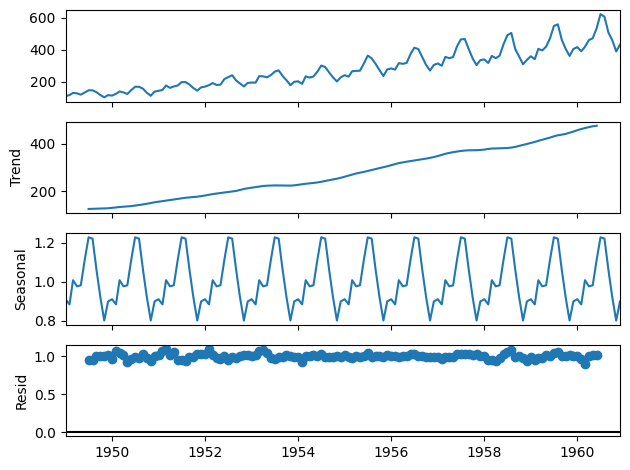

In [7]:
resultado = seasonal_decompose(data, model='multiplicative')
resultado.plot()
plt.show()

# O primeiro gráfico é a série original
# O segundo gráfico é a série de tendências
# O terceiro gráfico é a visão da sazonalidade mapeada
# O quarto gráfico dos resíduos são os erros: importante avaliar se existe uma tendência, pois não encontrar nenhum
    # padrão é benéfico para o nosso modelo, visto que se existir alguma tendência, tem algum dado
    # que não estamos explicando e deixamos passar no nosso modelo

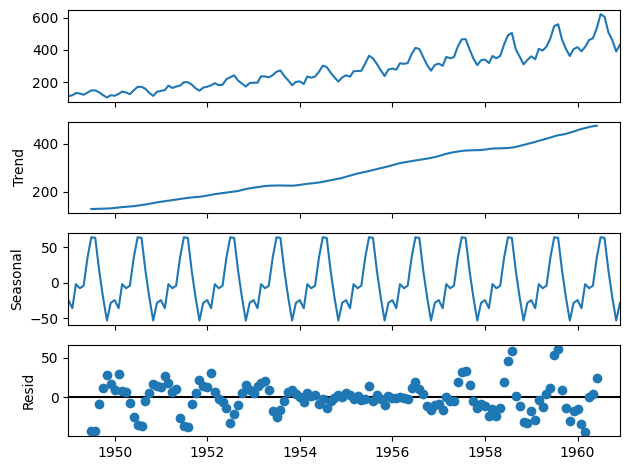

In [10]:
resultado = seasonal_decompose(data, model='aditive')
resultado.plot()
plt.show()

In [27]:
# Estacionariedade: não tem uma média constante ao longo de uma janela da série temporal

In [16]:
# Teste Dick-Fuller
from statsmodels.tsa.stattools import adfuller

In [17]:
y = data['#Passengers']

In [18]:
teste = adfuller(y)

In [19]:
# p <= 0.05 - série temporal estacionária

In [20]:
teste

(0.8153688792060498,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [21]:
print('Valor-p %f' %teste[1])

Valor-p 0.991880


In [22]:
# Tornar essa série estacionária

In [23]:
y_diff = np.diff(y)

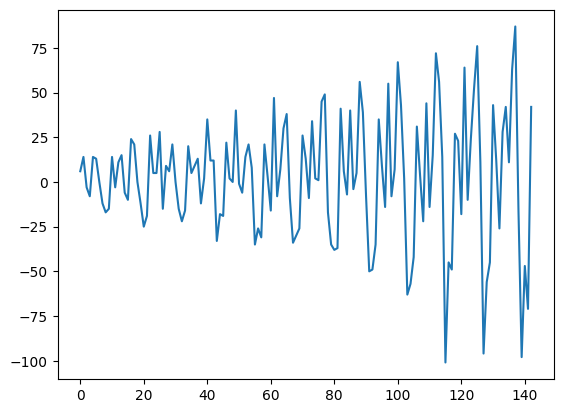

In [24]:
plt.plot(y_diff)
# Não enxergamos um componente de tendência agora da série temporal, a média ao longo das janelas devem ser similares

In [28]:
adfuller(y_diff)
# Hummm ele passou do 0.5 portanto apesar de ser bem pequeno, vamos tentar aprimorar

(-2.8292668241700047,
 0.05421329028382478,
 12,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.5069317854085)

In [29]:
# Segunda tentativa usando diferenciação

In [33]:
y_diff2 = np.diff(y_diff)

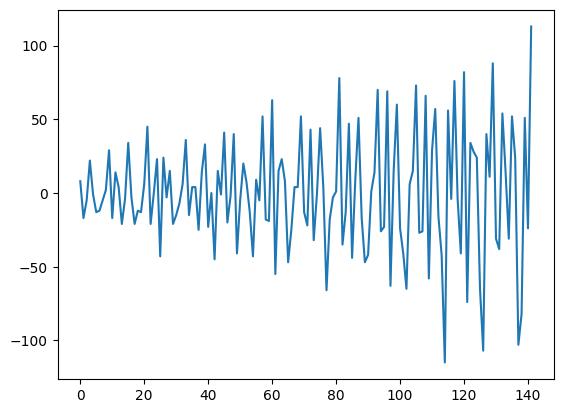

In [34]:
plt.plot(y_diff2)

In [35]:
adfuller(y_diff2)

(-16.384231542468513,
 2.7328918500142026e-29,
 11,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.6020417275611)

In [36]:
# Previsões

In [46]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [51]:
# Repete as informações do passado dando pesos para os dados mais recentes mais fortemente para criação do forecast

In [52]:
fit1 = SimpleExpSmoothing(data).fit(smoothing_level=0.2, optimized=False)
fcast1 = fit1.forecast(12).rename(r'$\alpha=0.2$')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

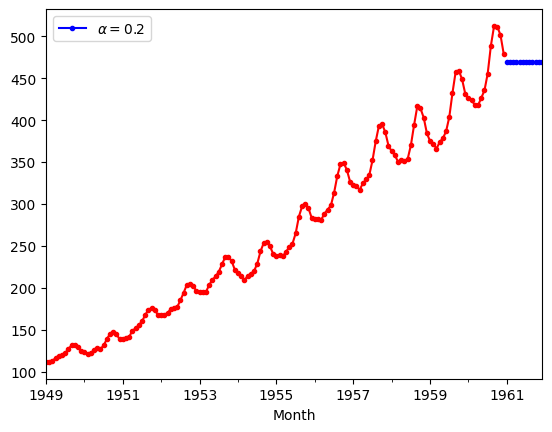

In [53]:
fcast1.plot(marker='.', color='blue', legend=True)
fit1.fittedvalues.plot(marker='.',  color='red')

In [54]:
fit2 = Holt(data).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized = False)
fcast2 = fit2.forecast(12).rename('Holts linear trend')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-54-1e471754a2af>:1: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit2 = Holt(data).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized = False)


<Axes: xlabel='Month'>

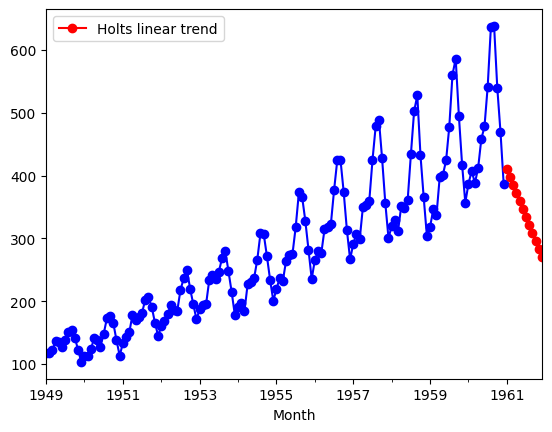

In [55]:
fit2.fittedvalues.plot(marker="o", color='blue')
fcast2.plot(color='red', marker="o", legend=True)

In [64]:
fit3 = Holt(data, damped=True).fit(smoothing_level=0.8, smoothing_slope=0.8)
fcast3 = fit2.forecast(12).rename("Additive damped trend")

<ipython-input-64-ca0842be9462>:1: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  fit3 = Holt(data, damped=True).fit(smoothing_level=0.8, smoothing_slope=0.8)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-64-ca0842be9462>:1: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit3 = Holt(data, damped=True).fit(smoothing_level=0.8, smoothing_slope=0.8)


<Axes: xlabel='Month'>

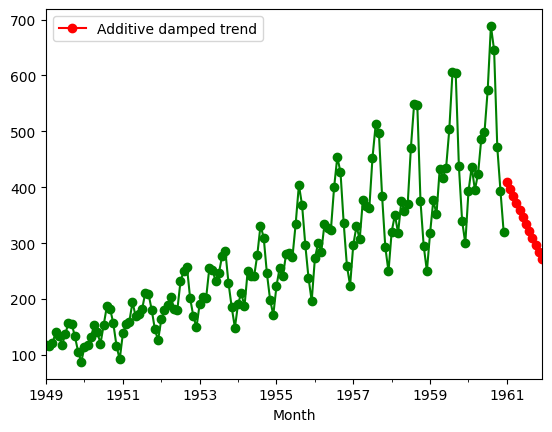

In [65]:
fit3.fittedvalues.plot(marker="o", color='green')
fcast3.plot(color='red', marker="o", legend=True)

<Axes: xlabel='Month'>

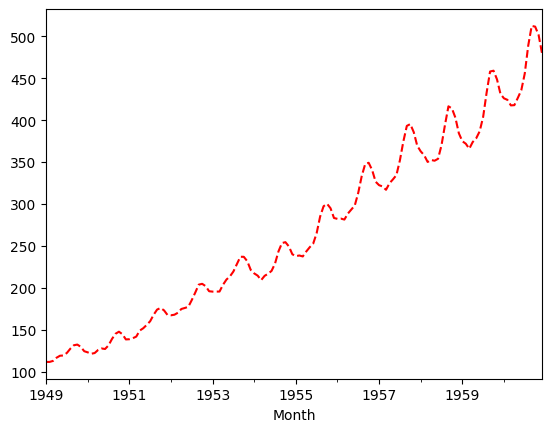

In [66]:
fit1.fittedvalues.plot(style='--', color='red')

<Axes: >

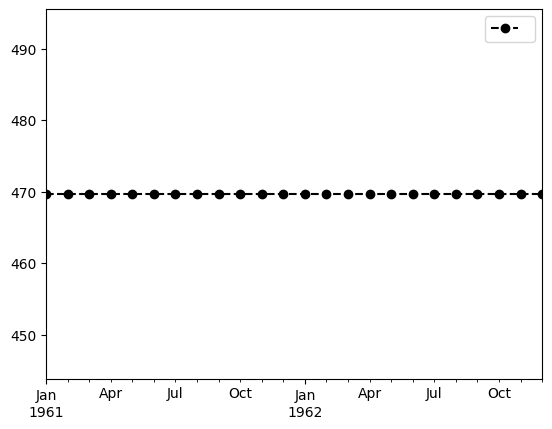

In [59]:
fit1.forecast(24).plot(style='--', marker='o', color='black', legend=True)

<Axes: xlabel='Month'>

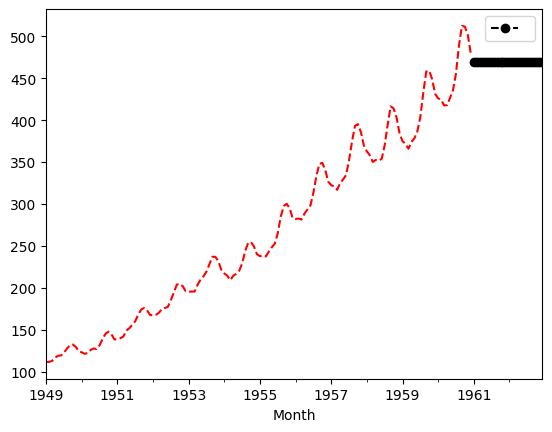

In [60]:
fit1.fittedvalues.plot(style='--', color='red')
fit1.forecast(24).plot(style='--', marker='o', color='black', legend=True)

## Ajustes ARIMA

In [67]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<function matplotlib.pyplot.show(close=None, block=None)>

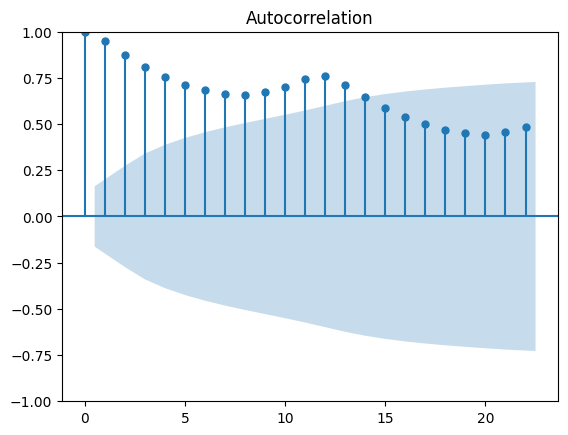

In [68]:
plot_acf(data)
plt.show

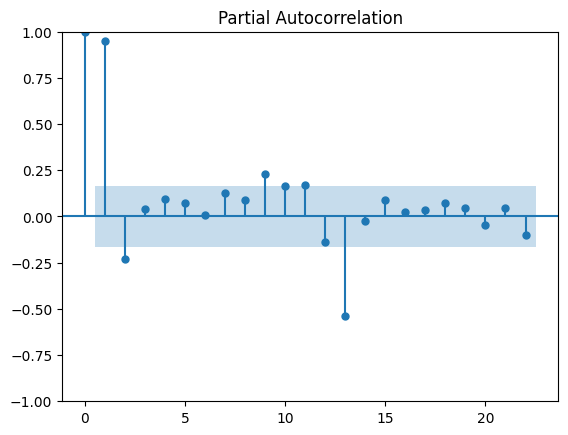

In [69]:
plot_pacf(data)
plt.show()

In [70]:
from statsmodels.tsa.arima.model import ARIMA

In [72]:
# p: contamos cerca de 8 correlações parciais significativas
# d: número de diferenciações da minha série, são 2
# q: em torno de 10 autocorrelações olhando acima
# NÃO É SINÔNIMO DE ACESSO! Nos guia na primeira tentativa de ajuste
model = ARIMA(data, order=(8,2,10))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                ARIMA(8, 2, 10)   Log Likelihood                -634.507
Date:                Wed, 01 May 2024   AIC                           1307.014
Time:                        19:07:10   BIC                           1363.175
Sample:                    01-01-1949   HQIC                          1329.836
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0901      0.307      0.293      0.769      -0.512       0.692
ar.L2         -0.1015      0.272     -0.373      0.709      -0.635       0.432
ar.L3          0.1429      0.188      0.760      0.4

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


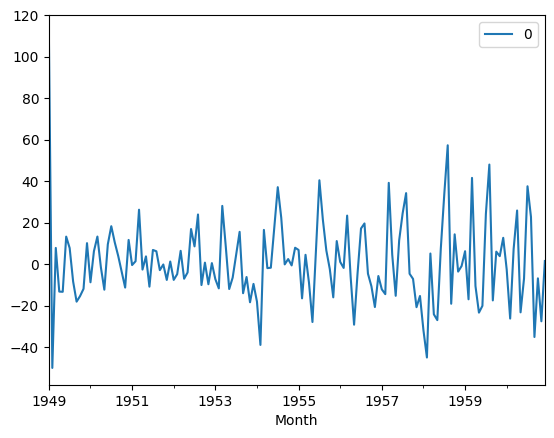

In [73]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# APARENTA ESTAR TUDO CERTO POR AQUI e sem padrões de significados nos ruídos

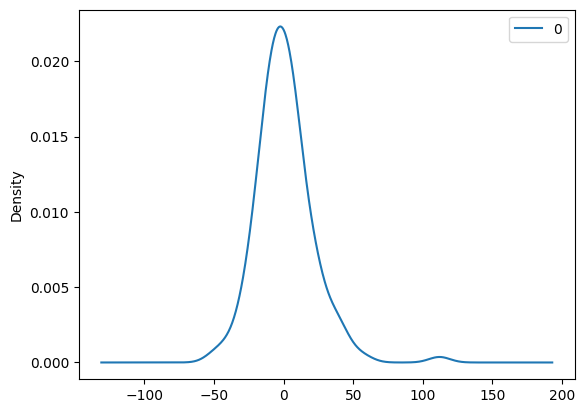

                0
count  144.000000
mean     0.867128
std     20.452655
min    -50.002952
25%    -11.354976
50%     -1.169108
75%      9.724451
max    112.000000


In [74]:
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [75]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.6 MB/s eta 0:00:00


In [76]:
## pip install pmdarima
from pmdarima.arima import auto_arima

In [78]:
# Vamos rodar os melhores modelos ARIMAS
stepwise_model = auto_arima(data, start_p=1, start_q=1,max_p=6, max_q=6, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore',
                            suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1022.896, Time=0.76 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.27 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.59 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.27 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=1.55 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=7.72 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.97 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.66 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=1.17 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=1.68 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=1.20 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.54 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=7.02 sec
 ARIMA(0,1,1)(1,1,1)[12]     

In [79]:
print(stepwise_model.aic())

1019.1780567487713


In [80]:
train = data.loc['1948-01-01':'1959-12-01']
test = data.loc['1960-01-01':]

In [81]:
stepwise_model.fit(train)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [82]:
future_forecast = stepwise_model.predict(n_periods=12)

In [83]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=["#Passengers"])

<Axes: xlabel='Month'>

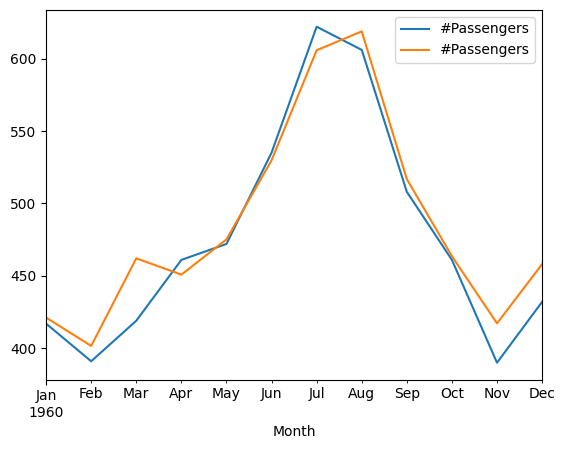

In [84]:
pd.concat([test,future_forecast],axis=1).plot()

<Axes: xlabel='Month'>

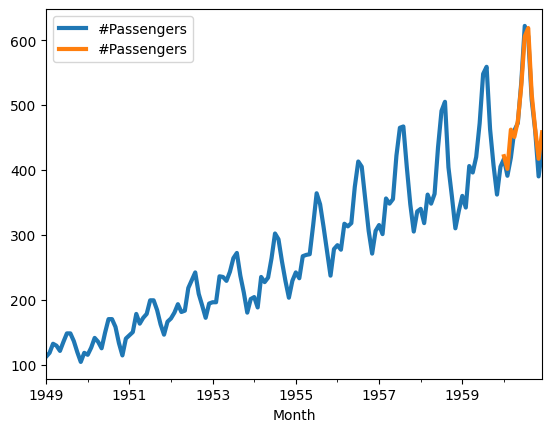

In [85]:
pd.concat([data,future_forecast],axis=1).plot(linewidth=3)